world_frame background


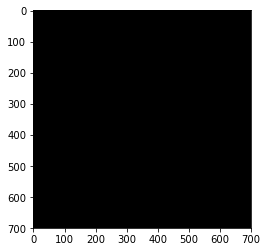

cartoonapple.jpeg


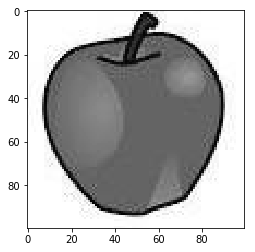

apple layered onto background


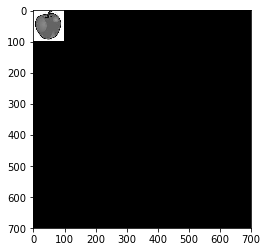

In [144]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Problem 3: 2D Affine Transformations in Image Processing
# Perform the following 2D homogenous affine transformations on the image of an apple:
# (output should be 500x500 gray scale image in 8-bit unsigned integers.)


# Setup world_frame and image to manipulate.
world_frame = np.zeros((700,700), dtype=np.uint8)

print('world_frame background')
plt.imshow(world_frame, cmap='gray')
plt.show()

apple = cv2.imread('cartoonapple.jpeg')
apple = cv2.cvtColor(apple, cv2.COLOR_BGR2GRAY)

print('cartoonapple.jpeg')
plt.imshow(apple, cmap='gray')
plt.show()

def layer_imgs(top, bottom):
    merged = np.array(bottom)
    top_height, top_width = np.shape(top)
    for x in range(top_width):
        for y in range(top_height):
            merged[x,y] = top[x,y]
    return merged

print('apple layered onto background')
merged = layer_imgs(apple, world_frame)
plt.imshow(merged, cmap='gray')
plt.show()

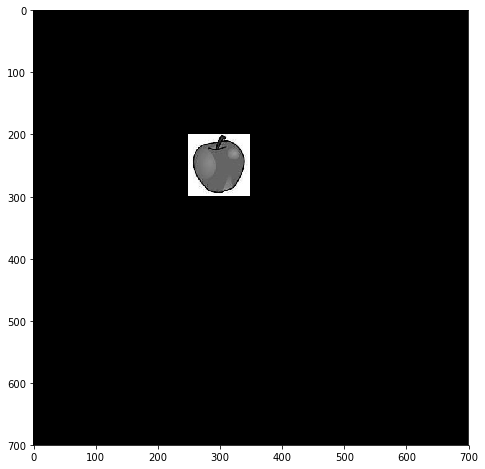

In [145]:
# 1.  Translate the apple by 250 pixels along the x-axis and 200 along the y-axis in
#     the current frame. After this transformation, the origin of the current frame should
#     be at (250, 200) in the world frame.

def homogeneous_translate(img, x_trans, y_trans, ROI, Inverse=False):
    background = np.zeros_like((img))
    # Bounding box points.
    y_min = ROI[0][0]
    x_min = ROI[0][1]
    y_max = ROI[1][0]
    x_max = ROI[1][1]

    # Translation matrix.
    t_mat = np.array([[1, 0, x_trans],
                      [0, 1, y_trans],
                      [0, 0, 1]])
    if (Inverse == True):
        t_mat = np.linalg.inv(t_mat)
    
    for x in range(x_min, x_max):
        for y in range(y_min, y_max):
            
            # Point matrix
            P_mat = np.array([[x], [y], [1]])
            
            # Matrix multiplication of translation matrix by 
            # point in homogenous coordinates.
            P_mat_prime = np.dot(t_mat, P_mat)
            
            x_prime, y_prime = float(P_mat_prime[0]), float(P_mat_prime[1])
            x_prime, y_prime = int(round(x_prime,0)), int(round(y_prime,0))
            
            # Setting intensity value from translated img to world frame.
            background[y_prime, x_prime] = img[y,x]
            
            
    return background

img1 = homogeneous_translate(merged, x_trans=250, y_trans=200, ROI=([0,0],[100,100]))
plt.figure(figsize=(8, 8))
plt.imshow(img1, cmap='gray')
plt.show()

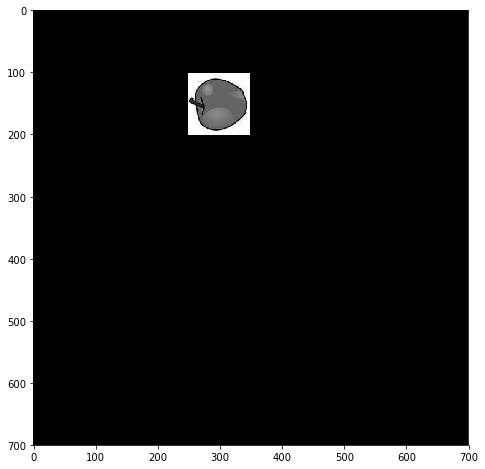

In [146]:
# 2.  Rotate the apple about the current frame z axis -90 degrees (clockwise).
import math

def image_rotation(img, theta, pivot_point, ROI, Inverse=False):
    background = np.zeros_like(img)
    # Bounding box points.
    y_min = ROI[0][0]
    x_min = ROI[0][1]
    y_max = ROI[1][0]
    x_max = ROI[1][1]
    
    # Pivot point offsets.
    y_pivot_offset = pivot_point[0]
    x_pivot_offset = pivot_point[1]
    #print(y_pivot_offset, x_pivot_offset)

    # Convert degrees to rads, find sin & cos.
    cos = math.cos(math.radians(theta))
    sin = math.sin(math.radians(theta))
    # Rotation matrix.
    r_mat = np.array([[cos, -sin],
                      [sin, cos]])
    if (Inverse == True):
        r_mat = np.linalg.inv(r_mat)
    
    for x in range(x_min, x_max):
        for y in range(y_min, y_max):
            # Point matrix relative to origin of ROI.
            P_mat = np.array([[x-x_pivot_offset], [y-y_pivot_offset]])
            P_mat_prime = np.dot(r_mat, P_mat)
            # XY prime shifted back to world_frame.
            x_prime, y_prime = float(P_mat_prime[0]), float(P_mat_prime[1])
            x_prime, y_prime = int(round(x_prime,0)), int(round(y_prime,0))
            background[y_prime+y_pivot_offset, x_prime+x_pivot_offset] = img[y,x]
    return background

img2 = image_rotation(img1, -90, (200,250), ((200,250),(300,350)))
plt.figure(figsize=(8, 8))
plt.imshow(img2, cmap='gray')
plt.show()

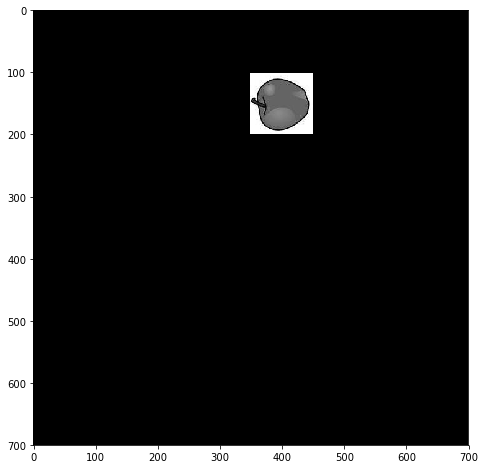

In [147]:
# 3.  Translate the apple by 100 pixels along the current frame y-axis.
#     After this transformation, the origin of the current frame should 
#     be at (350,200) in the world frame.

img3 = homogeneous_translate(img2, x_trans=100, y_trans=0, ROI=((100,250),(200,350)))
plt.figure(figsize=(8,8))
plt.imshow(img3, cmap='gray')
plt.show()

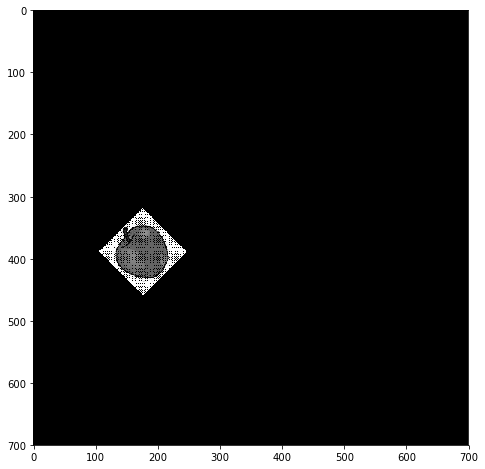

In [148]:
# 4.  Rotate the apple about the world frame z-axis 45 degrees. After this transformation,
#     the origin of the current frame should be at around (106, 389) in the world frame.

img4 = image_rotation(img3, 45, (0,0), ((100,350),(200,450)))
plt.figure(figsize=(8,8))
plt.imshow(img4, cmap='gray')
plt.show()

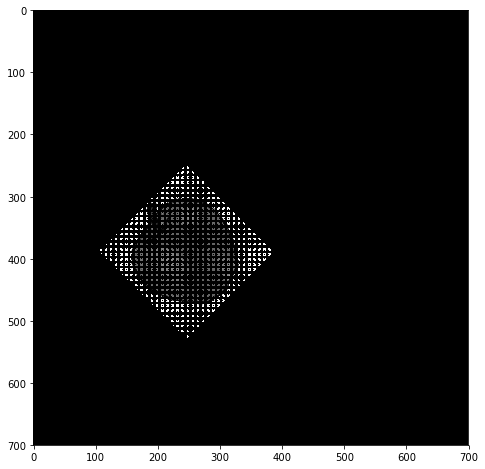

In [149]:
# 5.  Scale the apple by a factor of 2 in the current frame.

def homogeneous_scale(img, x_scale, y_scale, anchor, ROI, Inverse=False):
    background = np.zeros_like((img))
    # Bounding box points.
    y_min = ROI[0][0]
    x_min = ROI[0][1]
    y_max = ROI[1][0]
    x_max = ROI[1][1]
    
    y_anchor, x_anchor = anchor[0], anchor[1]

    # Scale matrix.
    s_mat = np.array([[x_scale, 0, 0],
                      [0, y_scale, 0],
                      [0, 0, 1]])
    if (Inverse == True):
        s_mat = np.linalg.inv(s_mat)
    
    for x in range(x_min, x_max):
        for y in range(y_min, y_max):
            
            # Point matrix
            P_mat = np.array([[x-x_anchor], [y-y_anchor], [1]])
            
            # Matrix multiplication of translation matrix by 
            # point in homogenous coordinates.
            P_mat_prime = np.dot(s_mat, P_mat)
            
            x_prime, y_prime = float(P_mat_prime[0]), float(P_mat_prime[1])
            x_prime, y_prime = int(round(x_prime,0)), int(round(y_prime,0))
            
            # Setting intensity value from translated img to world frame.
            background[y_prime+y_anchor, x_prime+x_anchor] = img[y,x]
    return background

img5 = homogeneous_scale(img4, 2, 2, (389,106), ((300,100),(475,275)))
plt.figure(figsize=(8,8))
plt.imshow(img5, cmap='gray')
plt.show()


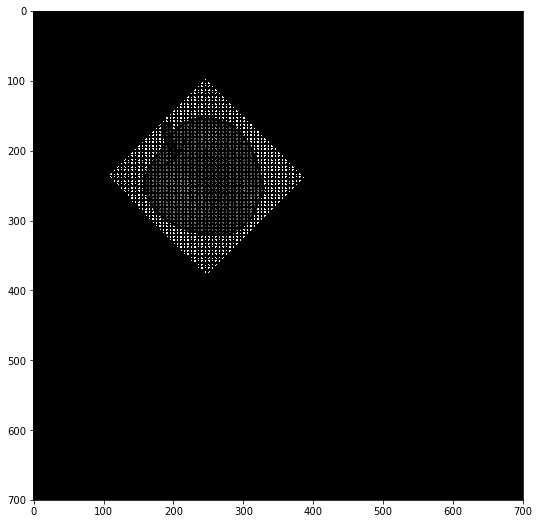

In [150]:
# 6.  Translate the apple by -150 pixels along the world frame
#     y-axis. After this transformation, the origin of the 
#     current frame should be at around (106,239) in the world frame.

img6 = homogeneous_translate(img5, x_trans=0, y_trans=-150, ROI=((200,100),(550,450)))
#img6 = img6[235:245,100:120]
#print(img6[9,0])
plt.figure(figsize=(9,9))
plt.imshow(img6, cmap='gray')
plt.show()

Inverse Transformed


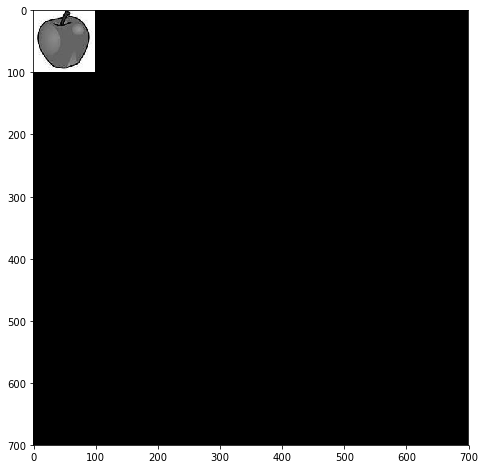

Final image


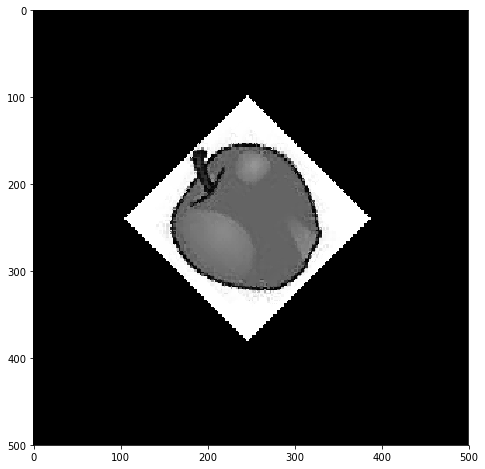

In [151]:
# Now to fill the holes in the image. This is done by using an inverse of 
# the previous transformations (or the original image) and comparing the pixel values
# to the current image. First to test the inversions that place the image back 
# in the starting location.

orig_img = homogeneous_translate(img6, x_trans=0, y_trans=-150, ROI=((50,50),(450,450)), Inverse=True)
orig_img = homogeneous_scale(img5, 2, 2, (389,106), ROI=((200,100),(550,450)), Inverse=True)
orig_img = image_rotation(img4, 45, (0,0), ROI=((300,100),(500,300)), Inverse=True)
orig_img = homogeneous_translate(img3, x_trans=100, y_trans=0, ROI=((100,300),(200,500)), Inverse=True)
orig_img = image_rotation(img2, -90, (200,250), ROI=((100,250),(200,350)), Inverse=True)
orig_img = homogeneous_translate(img1, x_trans=250, y_trans=200, ROI=((200,250),(300,350)), Inverse=True)

# This shows the proper inverse transformations needed to get the image back 
# to square one.

# Now to fill the holes.

# Modified functions used above to only transform single points. (These should 
# have been constructed first...)
def homogeneous_translate_point(x, y, x_trans, y_trans, Inverse=False):
    # Translation matrix.
    t_mat = np.array([[1, 0, x_trans],
                      [0, 1, y_trans],
                      [0, 0, 1]])
    if (Inverse == True):
        t_mat = np.linalg.inv(t_mat)
    # Point matrix.
    P_mat = np.array([[x], [y], [1]])
            
    # Matrix multiplication of translation matrix by 
    # point in homogenous coordinates.
    P_mat_prime = np.dot(t_mat, P_mat)
    x_prime, y_prime = float(P_mat_prime[0]), float(P_mat_prime[1])
    x_prime, y_prime = int(round(x_prime,0)), int(round(y_prime,0))
    return x_prime, y_prime

def homogeneous_scale_point(x, y, x_scale, y_scale, anchor, Inverse=False):
    
    y_anchor, x_anchor = anchor[0], anchor[1]
    # Scale matrix.
    s_mat = np.array([[x_scale, 0, 0],
                      [0, y_scale, 0],
                      [0, 0, 1]])
    if (Inverse == True):
        s_mat = np.linalg.inv(s_mat)
    # Point matrix.
    P_mat = np.array([[x-x_anchor], [y-y_anchor], [1]])
    P_mat_prime = np.dot(s_mat, P_mat)
    x_prime, y_prime = float(P_mat_prime[0]), float(P_mat_prime[1])
    x_prime, y_prime = int(round(x_prime,0)), int(round(y_prime,0))
    return x_prime+x_anchor, y_prime+y_anchor

def rotation_point(x, y, theta, pivot_point, Inverse=False):
    # Pivot point offsets.
    y_pivot_offset = pivot_point[0]
    x_pivot_offset = pivot_point[1]
    #print(y_pivot_offset, x_pivot_offset)

    # Convert degrees to rads, find sin & cos.
    cos = math.cos(math.radians(theta))
    sin = math.sin(math.radians(theta))
    # Rotation matrix.
    r_mat = np.array([[cos, -sin],
                      [sin, cos]])
    if (Inverse == True):
        r_mat = np.linalg.inv(r_mat)
    # Point matrix relative to origin of ROI.
    P_mat = np.array([[x-x_pivot_offset], [y-y_pivot_offset]])
    P_mat_prime = np.dot(r_mat, P_mat)
    # XY prime shifted back to world_frame.
    x_prime, y_prime = float(P_mat_prime[0]), float(P_mat_prime[1])
    x_prime, y_prime = int(round(x_prime,0)), int(round(y_prime,0))
    return x_prime+x_pivot_offset, y_prime+y_pivot_offset

final_img = img6

# Step through a region of interest from the final_img image where holes 
# may need to be filled.
for x in range(0,500):
    for y in range(0,500):
        # If the pixel value is 0 "black" it might be a hole,
        # start the transformations.
        if (final_img[y,x] == 0):
            x_prime, y_prime = homogeneous_translate_point(x, y, x_trans=0, y_trans=-150, Inverse=True)
            x_prime, y_prime = homogeneous_scale_point(x_prime, y_prime, 2, 2, (389,106), Inverse=True)
            x_prime, y_prime = rotation_point(x_prime, y_prime, 45, (0,0), Inverse=True)
            x_prime, y_prime = homogeneous_translate_point(x_prime, y_prime, x_trans=100, y_trans=0, Inverse=True)
            x_prime, y_prime = rotation_point(x_prime, y_prime, -90, (200,250), Inverse=True)
            x_prime, y_prime = homogeneous_translate_point(x_prime, y_prime, x_trans=250, y_trans=200, Inverse=True)
            
            # If the resultant pixel is in the 100x100 area
            # of the orig_img map the pixel value back
            # to the final_img.
            if 0 <= x_prime <= 100 and 0 <= y_prime <= 100:
                #print(x_prime, y_prime)
                #print(orig_img[y_prime, x_prime])
                final_img[y,x] = orig_img[y_prime,x_prime]

# Slice the image down to the required 500x500.
final_img = final_img[:500, :500]


plt.figure(figsize=(8,8))
plt.imshow(orig_img, cmap='gray')
print('Inverse Transformed')
plt.show()
plt.figure(figsize=(8,8))
plt.imshow(final_img, cmap='gray')
print('Final image')
plt.show()